In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

# A:


In [2]:
life_df= pd.read_csv('Life Expectancy Data.csv')

In [3]:
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
# dimensions of the data
life_df.shape

(2938, 22)

In [5]:
# to check continuous and categorical attributes
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# summary of the data
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# A: Solution

The life expectancy dataset has 22 features/attributes which predicts the Life expectancy of the people from the year 2000 to 2015. The data consists of 2939 rows and 22 attributes including the target variable Life expectancy. The **continuous valued attributes** are ''Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'.
The  **categorical attributes**  are 'Country', 'Year', 'Status'. The data contains missing values across various attributes that needs to be cleaned in order to proceed to the LR model. This problem is a supervised regression problem, there is no continuous flow of data coming into the system and there is no particular need to adjust to changing data rapidly, and the data is small
enough to fit in memory, so plain batch learning should is used. It is a univariate regression problem as we are trying to predict a value of Life expectancy.

# B:

In [7]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
#summary statistics
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
# missing values in each attribute
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# median imputation
column_medians = life_df.median()
life_df = life_df.fillna(column_medians)

In [11]:
life_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

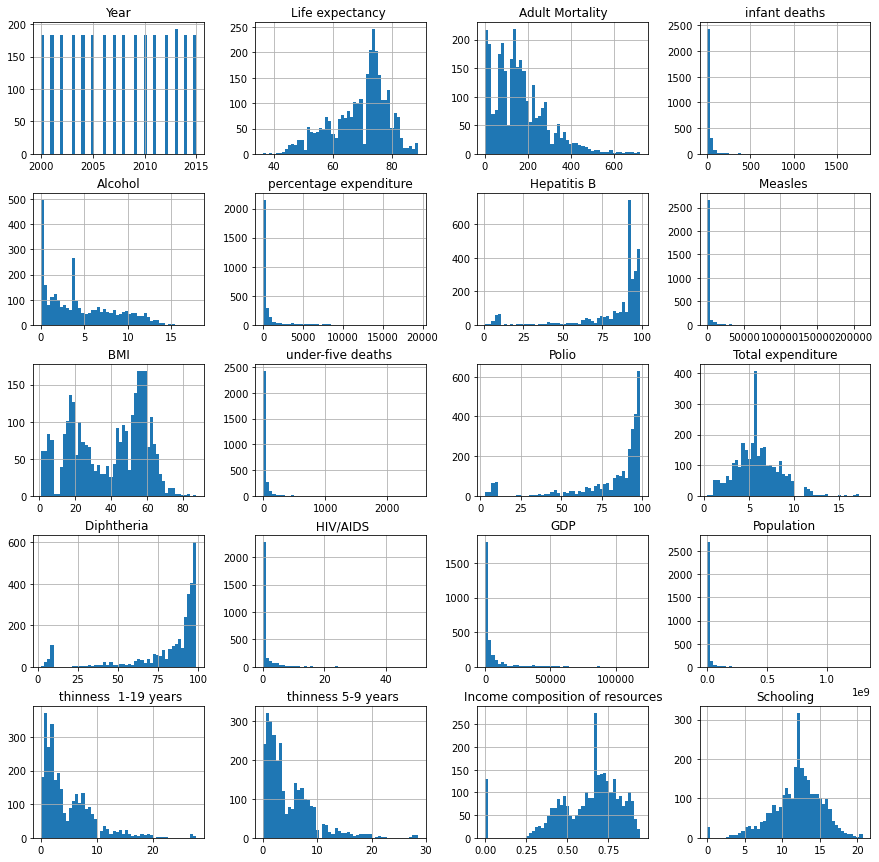

In [12]:
# histograms
life_df.hist(bins=50, figsize=(15, 15))
plt.show()

<Figure size 1440x720 with 0 Axes>

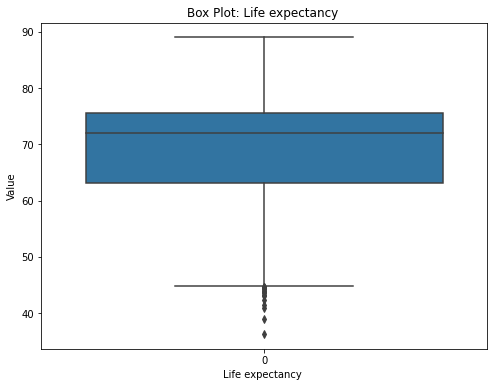

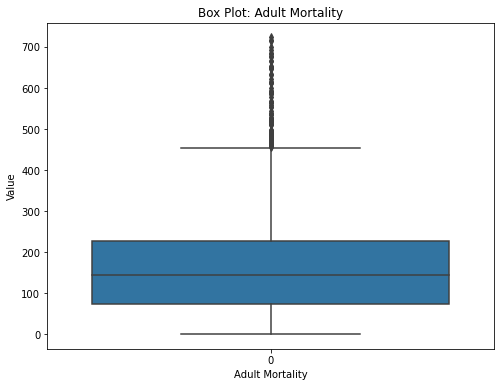

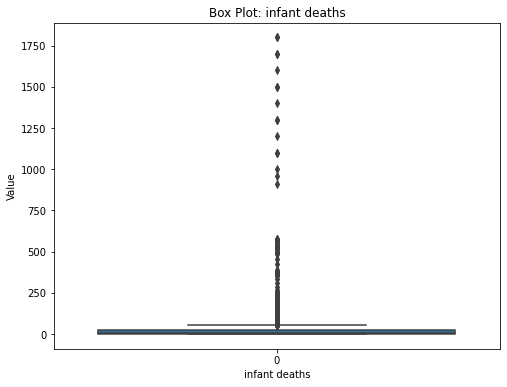

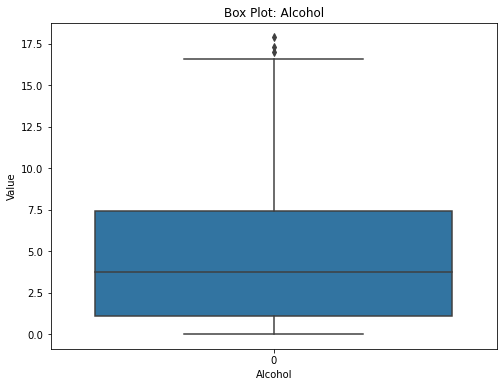

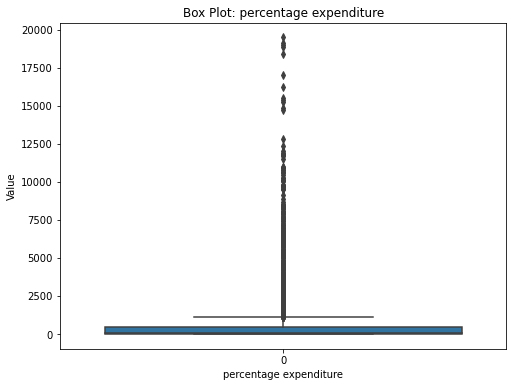

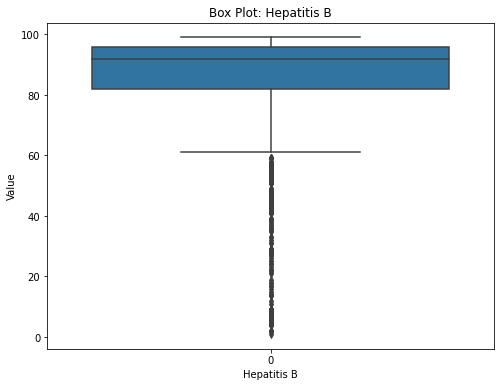

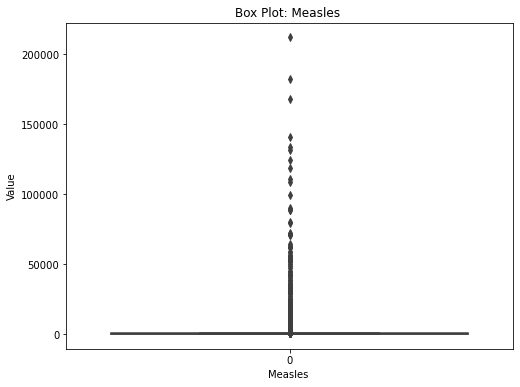

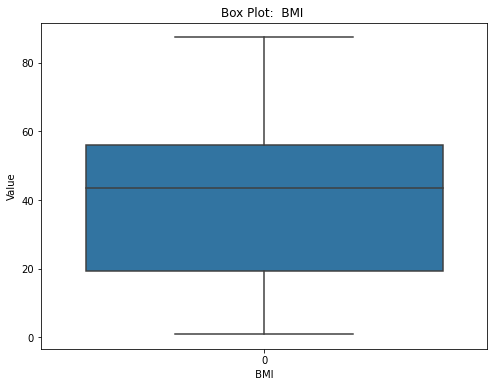

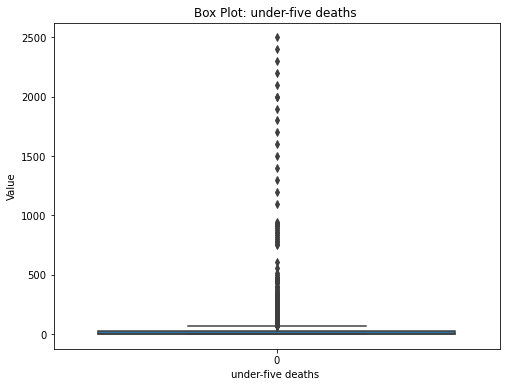

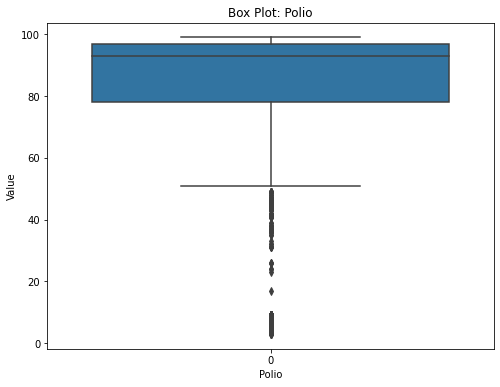

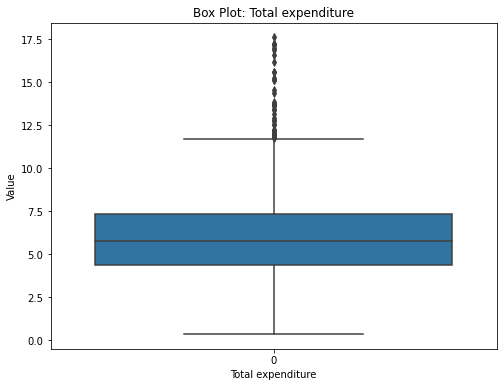

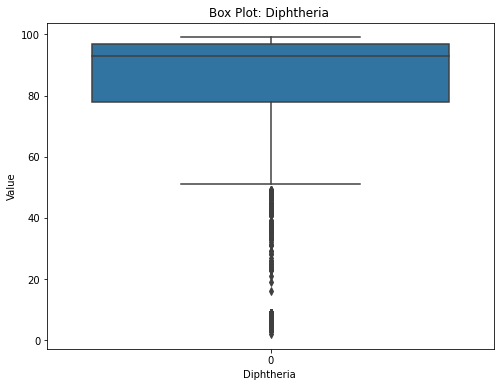

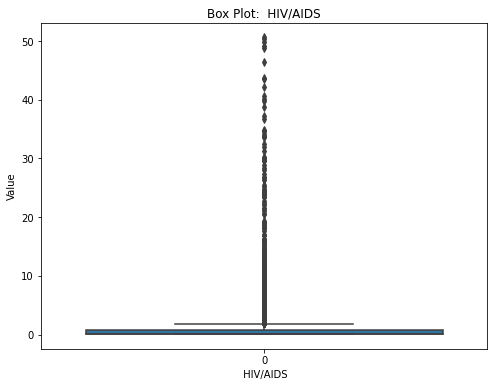

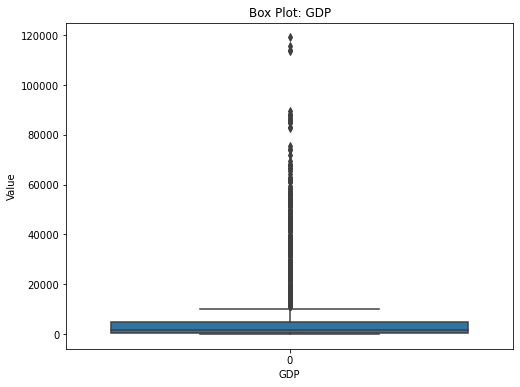

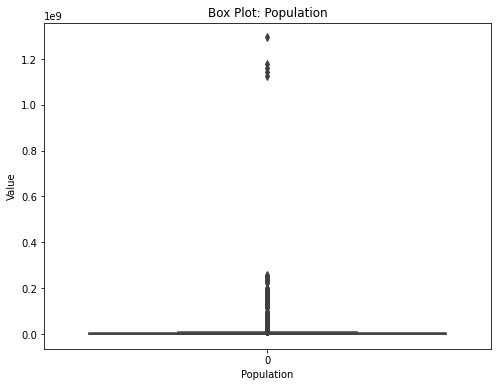

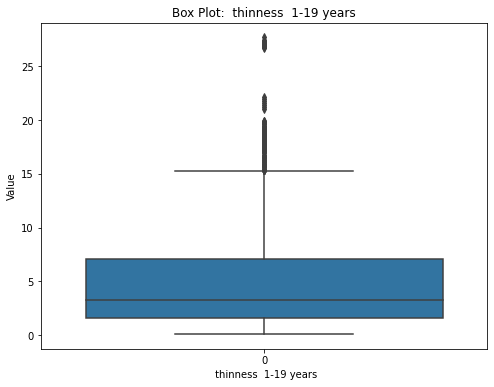

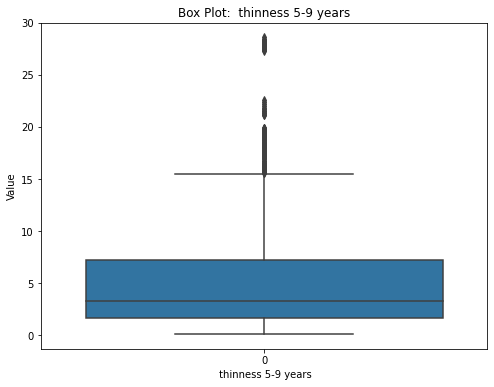

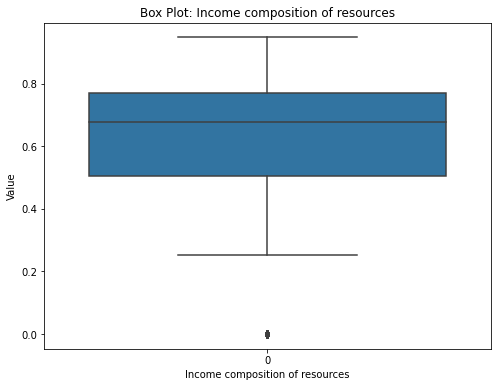

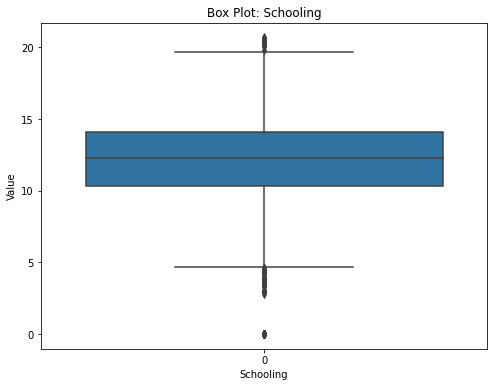

In [13]:
plt.figure(figsize=(20, 10))
cols = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=life_df[col], orient="vertical")
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

#Handling categorical attributes: label encoding

In [14]:
life_enco_label = life_df.copy()
label_encoder = LabelEncoder()
life_enco_label['Country'] = label_encoder.fit_transform(life_df['Country'])
life_enco_label['Status'] = label_encoder.fit_transform(life_df['Status'])

In [15]:
life_enco_label

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# B: Solution

There a a few attributes which have missing or N/A values-  'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'Hepatitis B',
        ' BMI ',  'Polio', 'Total expenditure',
       'Diphtheria ',  'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'.These attributes are median imputed to fill their missing values as median of their data is appropriate because these values have many outliers so mean and mode would alter the missing values and would not be a good measure to impute in this case.
       

From the histogram of data attributes, we can see how distributed these values are, across the dataset. The histogram of attributes like'Life expectancy ', 'BMI' and  'Schooling' are normally distributed, while attributes like 'Hepatitis B',
        'Polio',
       'Diphtheria 'are left skewed and attributes like
       ,  'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years','infant deaths', 'Alcohol', 'percentage expenditure','Measles ', 'under-five deaths ',
       'HIV/AIDS'
       are right skewed. Other attributes like 'Adult Mortality' and 'Total expenditure', are normal but slightly right skewed.   'Income composition of resources' is normal but slightly left skewed. The boxplot also shows the median of all the attributes and outliers if there are any. There are a few outliers in 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ',  'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
        'Schooling'features.

There are attributes that might require special treatment-
Since country, status are a categorical attribute, we cannot compute its correlation and compare with other attributes. It is transformed into a numerical attribute by Label Encoding. Here, label encoding is chosen instead of other methods like one-hot, as label encoding will  not increase dimensionality of the data (no need to create different labels as in one-hot) and will benefit linear regression.

# C:

In [16]:
mat_cor = life_enco_label.corr()
mat_cor

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.016402,0.039569,-0.030528,-0.061256,-0.032983,-0.014544,-0.024593,...,0.020327,0.052719,-0.003503,0.090206,-0.034409,-0.020070,0.003407,0.017923,-0.018484,-0.023323
Year,0.001342,1.000000,0.001864,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,...,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Status,-0.031635,0.001864,1.000000,-0.481415,0.314894,0.112252,-0.579662,-0.454261,-0.127008,0.076955,...,-0.218628,-0.290431,-0.215281,0.148590,-0.445981,0.037606,0.365814,0.364179,-0.460677,-0.492984
Life expectancy,-0.016402,0.170819,-0.481415,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,...,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,0.039569,-0.079535,0.314894,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,...,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.030528,-0.037415,0.112252,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,...,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.061256,-0.069147,-0.579662,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,...,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,-0.032983,0.031400,-0.454261,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,...,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,-0.014544,0.021302,-0.127008,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,...,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.024593,-0.082493,0.076955,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,...,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799


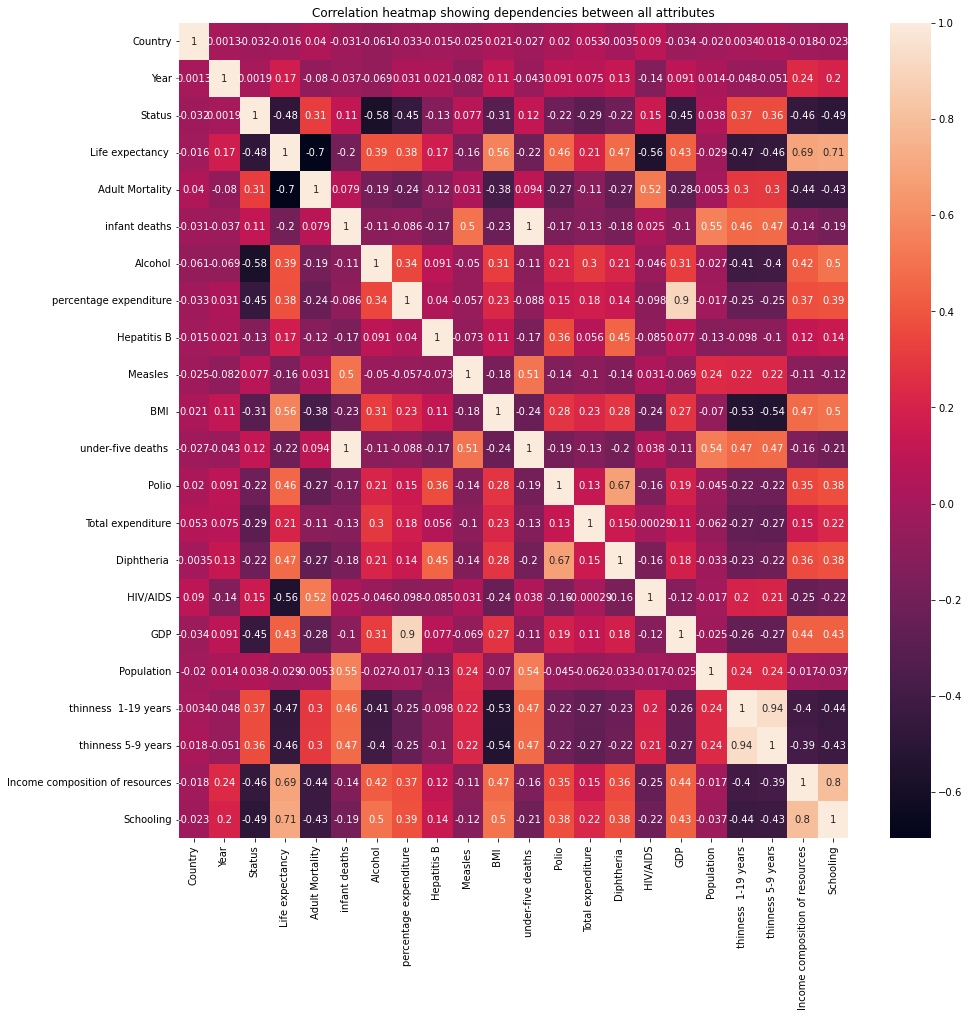

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(mat_cor, annot=True)
plt.title('Correlation heatmap showing dependencies between all attributes')
plt.show()

In [18]:
# pearson correlation table
pearson_corr = abs(mat_cor['Life expectancy ']).sort_values(ascending=False)
pearson_corr

Life expectancy                    1.000000
Schooling                          0.713054
Adult Mortality                    0.696390
Income composition of resources    0.688662
 BMI                               0.556901
 HIV/AIDS                          0.556703
Status                             0.481415
Diphtheria                         0.472211
 thinness  1-19 years              0.468002
 thinness 5-9 years                0.462473
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
under-five deaths                  0.222738
Total expenditure                  0.208844
infant deaths                      0.196769
Year                               0.170819
Hepatitis B                        0.170219
Measles                            0.157767
Population                         0.029014
Country                            0.016402
Name: Life expectancy , dtype: f

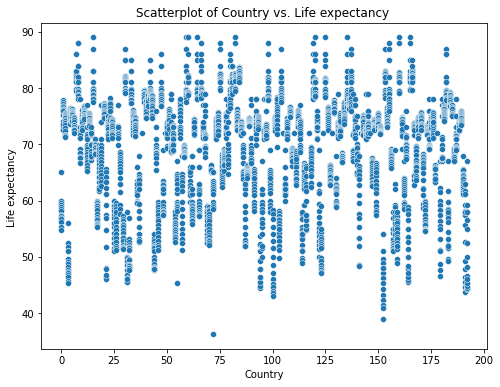

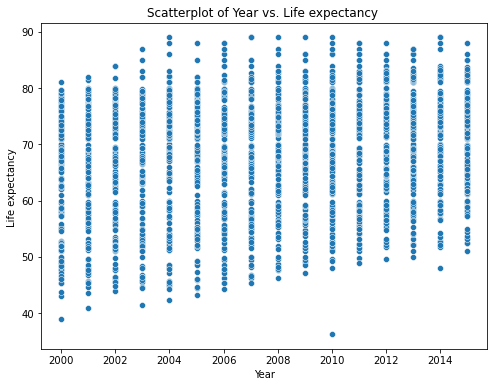

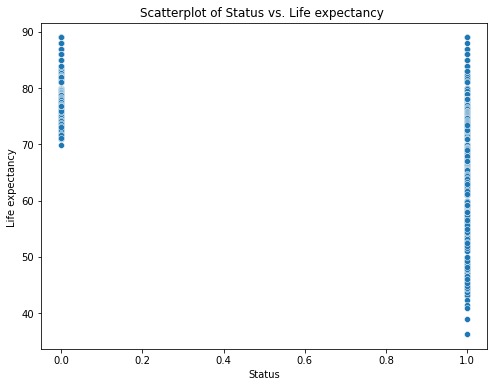

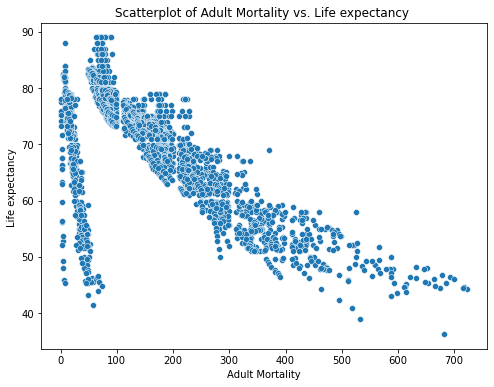

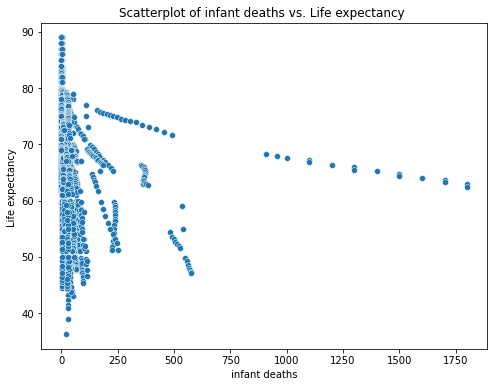

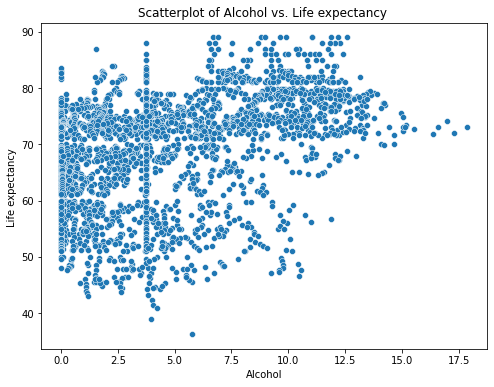

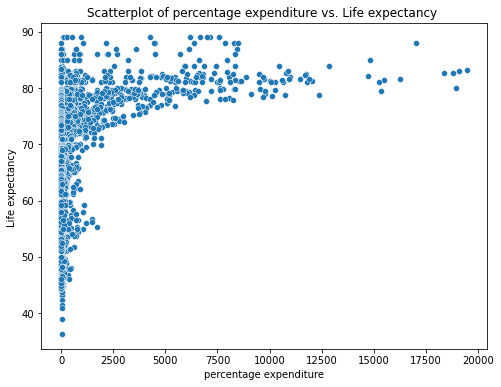

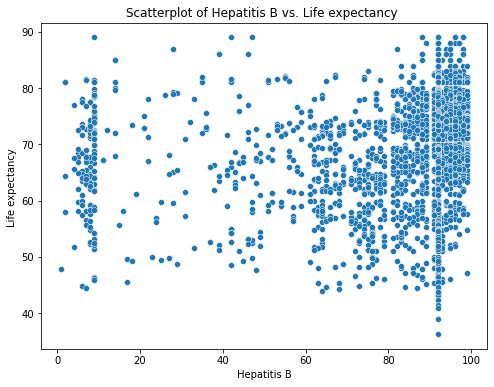

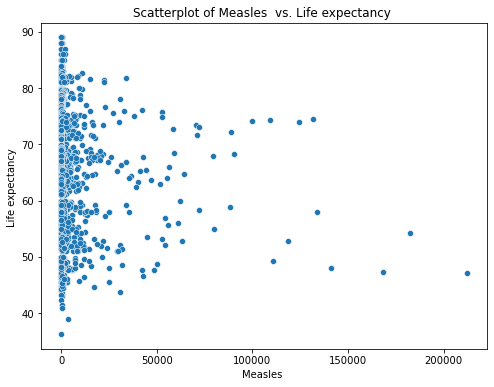

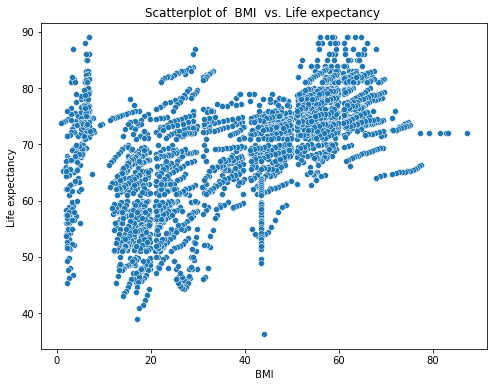

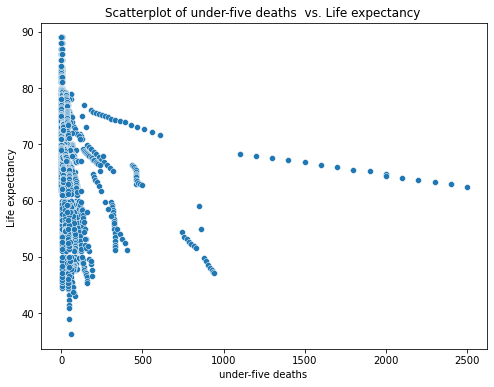

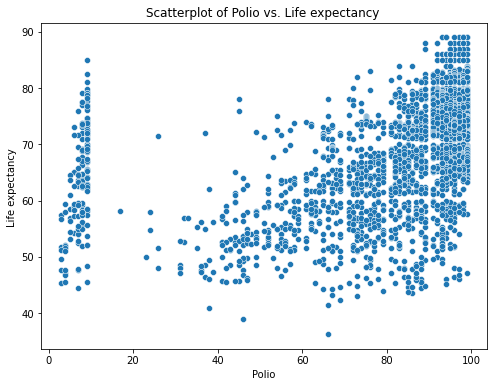

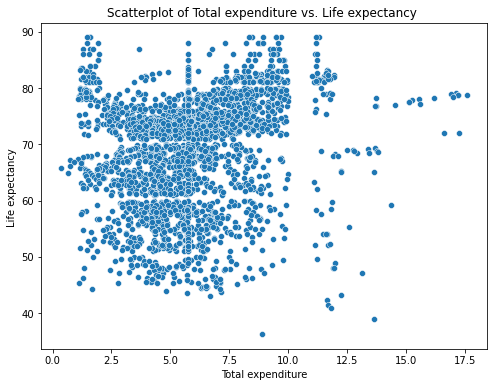

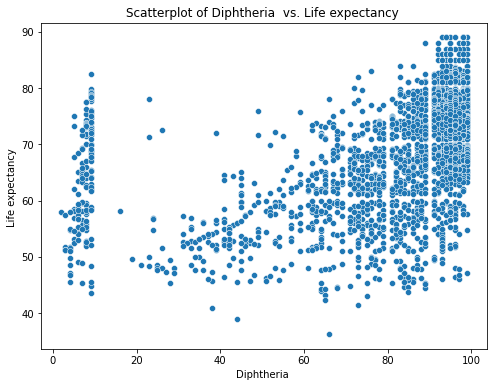

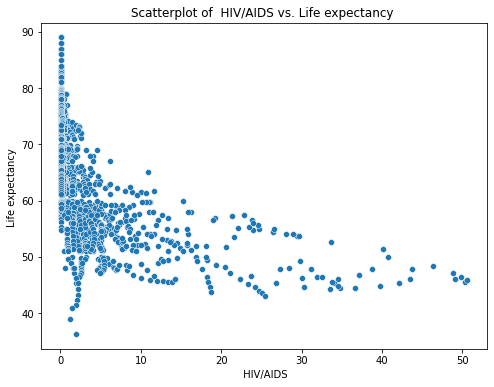

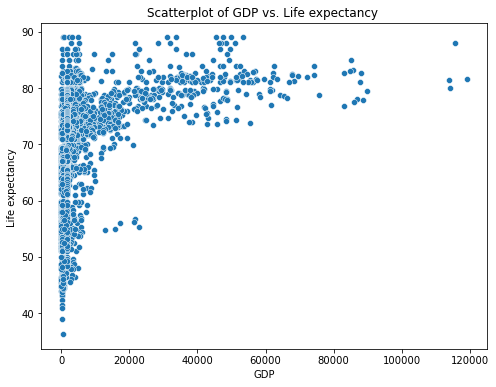

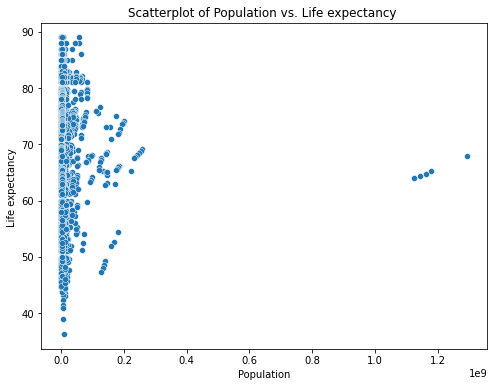

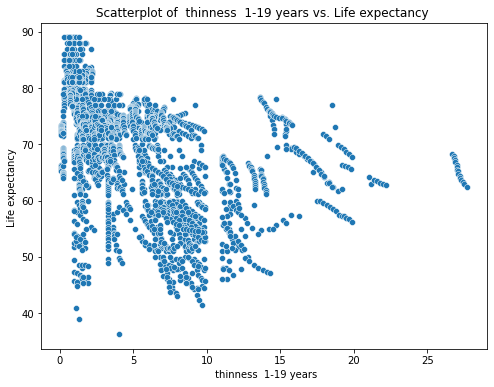

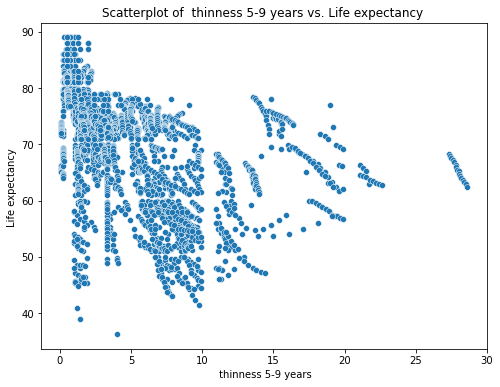

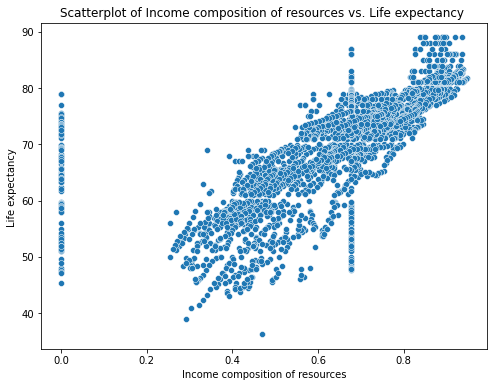

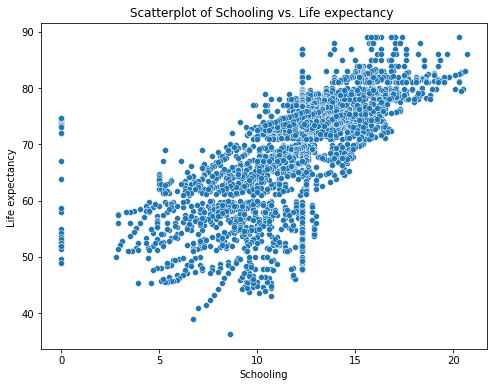

In [19]:
label = 'Life expectancy '
scat_vars = life_enco_label.columns.tolist()
scat_vars.remove(label)

for attribute in scat_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=attribute, y=label, data=life_enco_label)
    plt.title(f'Scatterplot of {attribute} vs. {label}')
    plt.xlabel(attribute)
    plt.ylabel(label)
    plt.show()

# C: Solution
The correlation heatmap shows the correlation between every attributes. The darker the color goes, the more correlated it is with another feature. From this we can analyse a few things:


1.  Infant deaths is highly correlated with under five deaths  
2.   Thinnesss 1-19 years and Thinness 5-9 years are correlated
3.  GDP and percentage expenditure are also highly correlated
4.  Schooling and income composition of resources are also correlated
5. Life expectancy is correlated to schooling adult mortality and income composition of resources.
6. Alcohol and Status are negatively correlated

The scatterplots are a good way to show the relationships between two attributes visually: From scatter and PCC table,


1.   Life expectancy is highly correlated with Schooling                          0.713054
Adult Mortality                    0.696390
Income composition of resources    0.688662. Hence these features are important for model prediction.
2.   Life ladder has almost zero  correlation with Population                         0.029014
Country                            0.016402. Hence these features are not important for model prediction

# D:

In [20]:
life_enco_label["Schooling Cat"] = pd.cut(life_enco_label["Schooling"], bins=[-1, 3.0, 6.0, 9.0 ,12.0, 15.0 ,18.0 ,np.inf], labels=[1, 2, 3, 4, 5, 6, 7])

In [21]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in sss.split(life_enco_label.drop(columns=['Life expectancy ', 'Population', 'Country']), life_enco_label['Schooling Cat']):
    strat_train_set_n = life_enco_label.iloc[train_index]
    strat_test_set_n = life_enco_label.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [22]:
strat_train_set, strat_test_set = strat_splits[0]

In [23]:
def proportions(data):
    return data["Schooling Cat"].value_counts() / len(data)

train_set, test_set = train_test_split(life_enco_label, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": proportions(life_enco_label),
    "Stratified %": proportions(strat_test_set),
    "Random %": proportions(test_set),
}).sort_index()
compare_props.index.name = "Schooling"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Schooling,,,,,
1,1.16,1.19,1.36,2.87,17.57
2,3.95,3.91,4.76,-0.93,20.61
3,11.30,11.22,10.20,-0.67,-9.70
4,27.06,27.04,29.59,-0.07,9.36
5,39.62,39.63,37.59,0.02,-5.13
6,14.87,14.97,14.80,0.62,-0.53
7,2.04,2.04,1.70,-0.07,-16.72


In [24]:
strat_train_set.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Schooling Cat'],
      dtype='object')

In [25]:
y_train = np.array(strat_train_set['Life expectancy '])
X_train = np.array(strat_train_set.drop(columns=['Life expectancy ', 'Population', 'Year','Schooling Cat', 'Country','infant deaths','under-five deaths ',
' thinness 5-9 years','percentage expenditure',' thinness  1-19 years']))

In [26]:
y_test = np.array(strat_test_set['Life expectancy '])
X_test = np.array(strat_test_set.drop(columns=['Life expectancy ', 'Population', 'Year','Schooling Cat', 'Country','infant deaths','under-five deaths ',
' thinness 5-9 years','percentage expenditure',' thinness  1-19 years']))

# D Solution:

The schooling attribute is highly correlated to Life expectancy from the correlation map and PCC table, hence I used this attribute as a variable to perform stratified splitting method. This sampling method takes the stratified samples of the data and spilts it as number of times as mentioned in the test size. Here I have mentioned 0.2, which means 20 percent of the data is being stratified shuffled and split from the whole population. To perform this, we should have categories of the splitting variable to handle the Stratifed shuffle split.

In a stratified sample, we divide a population into homogeneous subpopulations called strata  based on specific attributes of the data. Once the strata test and strata train data are obtained, we find the proportions of 'schooling cat' in the whole data and the samples obtained using various sampling methods. The table shows that in each category of schooling, the overall population ratio,stratifed ratio, and error values are shown. The first row represents when the schooling label is 1, we have the overall proportion of population as 1.16, the stratified proportion(sample test) is	1.19, by randominsing we get	1.36 and the stratied error is	2.87. From these values we say that, sample test set is representative of the population data. This can be verified using .describe tables too. We then create a training and testing sets, from stratas, and drop those columns which are least correlated. thinness columns are correlated to GDP and hence retaining GDP and dropping them. infant deaths and under five deaths are correlated but less correlated to life expectancy hence we drop both of them.

# E:

In [27]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03,2.350000e+03
mean,-1.367228e-16,-7.471565e-17,-2.014553e-16,1.464550e-16,6.029456e-17,-2.497766e-16,1.962969e-16,-4.643449e-17,2.645638e-18,-2.049188e-16,1.383527e-16,1.745412e-16,5.610878e-16
std,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00
min,-2.146763e+00,-1.308550e+00,-1.151665e+00,-3.638944e+00,-2.076707e-01,-1.863008e+00,-3.454950e+00,-2.218171e+00,-3.372162e+00,-3.229871e-01,-4.958877e-01,-3.051242e+00,-3.672906e+00
25%,4.658176e-01,-7.287147e-01,-8.935539e-01,-5.681351e-02,-2.076707e-01,-9.513683e-01,-2.066214e-01,-6.535095e-01,-1.795784e-01,-3.229871e-01,-4.513636e-01,-6.023666e-01,-5.536349e-01
50%,4.658176e-01,-1.649305e-01,-2.039923e-01,3.854248e-01,-2.062775e-01,2.658206e-01,4.430444e-01,-5.351048e-02,4.505368e-01,-3.229871e-01,-3.647023e-01,2.300814e-01,8.856805e-02
75%,4.658176e-01,4.891395e-01,7.228038e-01,5.623202e-01,-1.771825e-01,8.919466e-01,6.162886e-01,5.835910e-01,6.185676e-01,-1.862479e-01,-1.345822e-01,6.953799e-01,6.390277e-01
max,4.658176e-01,4.485788e+00,3.367810e+00,6.949917e-01,1.718235e+01,2.459766e+00,7.029107e-01,4.969096e+00,7.025829e-01,9.405029e+00,8.360284e+00,1.543580e+00,2.626799e+00


In [29]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,0.052603,0.027051,-0.018028,-0.058017,-0.046801,0.047060,-0.033083,0.090897,0.024816,-0.011072,-0.023377,0.020150,-0.000835
std,0.954127,0.978716,0.961489,1.081210,0.643627,0.991903,1.058535,1.083998,0.967892,0.958752,0.938897,0.970890,0.992548
min,-2.146763,-1.308550,-1.151665,-3.594720,-0.207671,-1.807909,-3.454950,-2.336899,-3.330154,-0.322987,-0.495591,-3.051242,-3.672906
25%,0.465818,-0.714670,-0.855596,-0.056814,-0.207671,-0.857449,-0.174138,-0.592026,-0.137571,-0.322987,-0.455808,-0.632660,-0.523054
50%,0.465818,-0.144867,-0.203992,0.385425,-0.206564,0.298379,0.443044,-0.053510,0.450537,-0.322987,-0.364702,0.230081,0.088568
75%,0.465818,0.619552,0.675989,0.562320,-0.183165,0.913235,0.616289,0.689598,0.618568,-0.186248,-0.162848,0.677204,0.639028
max,0.465818,3.394334,3.145126,0.694992,7.200235,2.259406,0.702911,4.816446,0.702583,9.541769,5.891250,1.514499,2.657380


Linear Model using K-Fold with Normal form or SVD

In [30]:
svd_lr = LinearRegression()
svd_lr.fit(X_train, y_train)
# mean sqaured error
cross_val_svd = cross_val_score(svd_lr, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
cross_val_svd

array([-16.63142461, -17.37068541, -18.37313881, -17.07296055])

In [31]:
# rmse
svd_rmse = np.sqrt(-cross_val_svd.mean())
svd_rmse

4.166779613244903

In [32]:
# r2 score
cross_val_score(svd_lr, X_train, y_train, cv=4, scoring="r2")

array([0.82129319, 0.81129356, 0.78830579, 0.80870103])

Stochastic Gradient Descent

In [33]:
sgd_lr= SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_lr.fit(X_train, y_train.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [34]:
# mean squared error
cross_val_sgd = cross_val_score(sgd_lr, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
cross_val_sgd

array([-16.630778  , -17.32745371, -18.39740593, -17.09344586])

In [35]:
# rmse
sgd_rmse = np.sqrt(-cross_val_sgd.mean())
sgd_rmse

4.166805836312675

In [36]:
# r2 score
cross_val_score(sgd_lr, X_train, y_train, cv=4, scoring="r2")

array([0.82130014, 0.81176321, 0.78802619, 0.8084715 ])

#Regularization for SVD or closed form solution

Ridge

In [37]:
alp_val = [0.1, 1.0, 100.0]

In [38]:
r_rmse = list()
for a in alp_val:
    r = Ridge(alpha=a, solver="cholesky")
    ridge_cross = cross_val_score(r, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    r_rmse.append(np.sqrt(-ridge_cross.mean()))

In [39]:
r_rmse

[4.166774222242135, 4.166726252678907, 4.166553457464043]

Lasso

In [40]:
l_rmse = list()
for a in alp_val:
    l= Lasso(alpha=a)
    lasso_cross = cross_val_score(l, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    l_rmse.append(np.sqrt(-lasso_cross.mean()))

In [41]:
l_rmse

[4.17589071194791, 4.517290214844507, 9.511321858862642]

Elastic Net

In [42]:
e_rmse = list()
for a in alp_val:
    e = ElasticNet(alpha=a, l1_ratio=0.5)
    elasticnet_cross = cross_val_score(e, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    e_rmse.append(np.sqrt(-elasticnet_cross.mean()))

In [43]:
e_rmse

[4.171194516370377, 4.555532588015666, 9.511321858862642]

# Regularization for Stocastic gradient descent

Ridge

In [44]:
alpha_val = [0.1,10.0,100.0]

In [45]:
cross_val_sgd_r=list()
sgd_rmse_r =list()
for a in alpha_val:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', alpha= a, random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

In [46]:
sgd_rmse_r

[4.178610709777899, 7.485471654523325, 9.249713938639859]

Lasso

In [47]:
cross_val_sgd_l=list()
sgd_rmse_l =list()
for a in alpha_val:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', alpha= a, random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

In [48]:
sgd_rmse_l

[4.1796225597053445, 9.509328918334218, 9.509328918327563]

Elastic Net

In [49]:
cross_val_sgd_e=list()
sgd_rmse_e =list()
for a in alpha_val:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', alpha= a, l1_ratio = 0.5,random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [50]:
sgd_rmse_e

[4.178133215276549, 9.079104535593837, 9.50932891832784]

# Trying different values of learning rate and batch size

Ridge

In [51]:
eta= [0.01, 1,10]

In [52]:
cross_val_sgd_r=list()
sgd_rmse_r =list()
for etas in eta:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

In [53]:
sgd_rmse_r

[4.170203609862579, 11375095926.5158, 5528147022505.871]

In [54]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_ridge = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l2', eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_ridge.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_ridge.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

RMSE values for different batch sizes:
Batch Size=1: RMSE=4.332268766844374
Batch Size=10: RMSE=4.332325918397178
Batch Size=1000: RMSE=4.332349625666835
Batch Size=10000: RMSE=4.332011351637504


Lasso

In [55]:
cross_val_sgd_l=list()
sgd_rmse_l =list()
for etas in eta:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

In [56]:
sgd_rmse_l

[4.170211104851152, 215594695628.54245, 7369899087299.304]

In [57]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_lasso = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l1', eta0=0.01, learning_rate='adaptive', random_state=42, warm_start = True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_lasso.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_lasso.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

RMSE values for different batch sizes:
Batch Size=1: RMSE=4.332100017817786
Batch Size=10: RMSE=4.332157353843859
Batch Size=1000: RMSE=4.332180982757391
Batch Size=10000: RMSE=4.331841776363178


Elastic Net

In [58]:
cross_val_sgd_e=list()
sgd_rmse_e =list()
for etas in eta:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', l1_ratio = 0.5, eta0= etas, learning_rate='invscaling',random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [59]:
sgd_rmse_e

[4.170207434250293, 215583728475.82242, 6701855038725.765]

In [60]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_elastic = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='elasticnet',l1_ratio = 0.5,  eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_elastic.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_elastic.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

RMSE values for different batch sizes:
Batch Size=1: RMSE=4.332183372091695
Batch Size=10: RMSE=4.332240543423035
Batch Size=1000: RMSE=4.332264196313576
Batch Size=10000: RMSE=4.331925601755583


Visualize the training and validation loss

In [61]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_lr = SGDRegressor(max_iter=epoch, tol=1e-5, penalty=None, eta0=0.01,random_state=42)
  sgd_lr.fit(X_train, y_train.ravel())
  y_pred = sgd_lr.predict(X_train)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_lr.predict(X_test)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

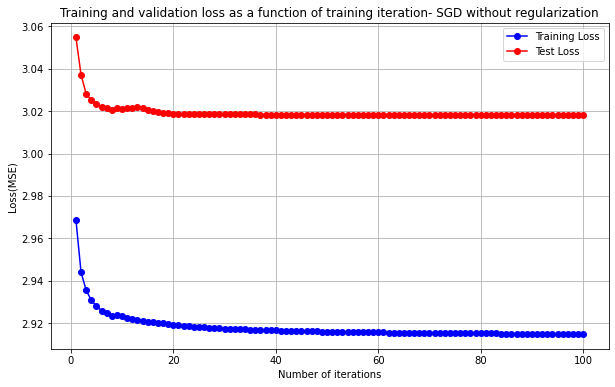

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD without regularization')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =1000
for epoch in range(1,n_iter+1,10):
  sgd_elastic = SGDRegressor(max_iter=epoch, tol=1e-5, penalty='l1',alpha=0.1 ,random_state=42)
  sgd_elastic.fit(X_train, y_train.ravel())
  y_pred = sgd_elastic.predict(X_train)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_elastic.predict(X_test)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

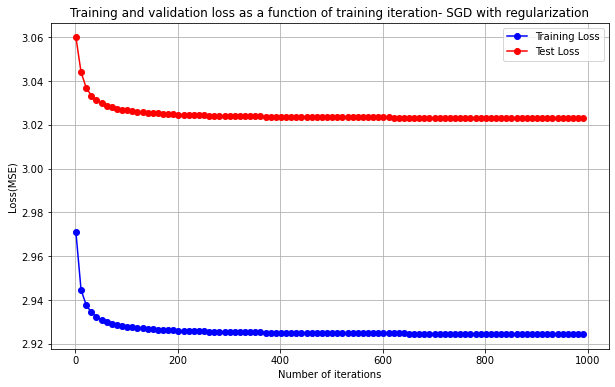

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1,10), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1,10), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD with regularization')
plt.legend()
plt.grid(True)
plt.show()

# E: Solution

Initially before passing to the model, the data is standard scaled to make it normalised. The SVD or normal equation LR model gives RMSE of 4.166779613244903.While the rmse of stochastic Gradient descent is almost similar 4.166805836312676.

We apply closed form SVD regularisation to check if the model is overfitting, after applying ridge, lasso and elasticnet methods, we find that Ridge gives the lowest RMSE when compared to other two regularisation across different learning rates. As we increase the learning rates, the error decreases for ridge, increases for both lasso and elastic net.

I also applied SGDregressor with regularisation and see that, elastic net gives rmse of 4.178133215276549, and is the lowest when compared to other two methods. As we increase the learning rates  regularisation factor alpha, the error increases for Ridge and elastic net but we can observe a slight increase and then decrease in error for lasso. This is observed because in higher alpha values, lasso eliminates the weights of least important features i.e some features are irrelevent and removing such features improves rmse.

If we increase the  learning rate eta for ridge, lasso and elastic net the error increases immensely. If we increase the batch size, there is slight decrease in rmse values of ridge lasso and elastic net but we cannot observe signicant decrease, and when the batch size reaches to a value more than the number of the data points(rows), then we are essentially performing batch gradient descent and not mini batch gradient and hence this converges to the global minimum and we get lower rmse values. With Stochastic and Mini-batch Gradient Descent, the curves/values are not so
smooth/easy to analyse, and it may be hard to know whether you have reached the
minimum or not.

From the training and validation losses graphs, we observe that the training loss is less than the test loss, and there is a significant gap in between the losses, this means that the model is overfitting. To reduce overfitting, we use regularization.We have chosen Lasso here as it constrains the weights of the model by eliminating least important features, hence reducing the gap between the losses. But we observe that regularisation reduced the gap between training and testing loss slightlty. If we used a much larger training set,
however, the two curves would continue to
get closer.

# F:

In [65]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [66]:
# Linear Model using K-Fold with Normal form or SVD
svd_lr = LinearRegression()
svd_lr.fit(X_train_poly, y_train)

# mean sqaured error
cross_val_svd = cross_val_score(svd_lr, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
# average of mse
svd_rmse = np.sqrt(-cross_val_svd.mean())
svd_rmse

3.5436594675525033

In [67]:
#Stochastic Gradient descent

sgd_lr= SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.0001, n_iter_no_change=1000, random_state=42)
sgd_lr.fit(X_train_poly, y_train.ravel())
# mean sqaured error
cross_val_sgd = cross_val_score(sgd_lr, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
# average of mse
sgd_rmse = np.sqrt(-cross_val_sgd.mean())
sgd_rmse

8.56434642316121

Regularization

In [68]:
alp_val = [0.1, 1.0, 100.0]
# ridge

r_rmse = list()
for a in alp_val:
    r = Ridge(alpha=a, solver="cholesky")
    ridge_cross = cross_val_score(r, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    r_rmse.append(np.sqrt(-ridge_cross.mean()))

#lasso
l_rmse = list()
for a in alp_val:
    l= Lasso(alpha=a)
    lasso_cross = cross_val_score(l, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    l_rmse.append(np.sqrt(-lasso_cross.mean()))

# elasticnet

e_rmse = list()
for a in alp_val:
    e = ElasticNet(alpha=a, l1_ratio=0.5)
    elasticnet_cross = cross_val_score(e, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    e_rmse.append(np.sqrt(-elasticnet_cross.mean()))


In [69]:
print(f'Ridge rmse:',r_rmse)
print(f'Lasso rmse:',l_rmse)
print(f'Elastic net rmse:',e_rmse)

Ridge rmse: [3.543534657908679, 3.540136928326753, 3.3632644205028224]
Lasso rmse: [3.302050588821822, 4.469770271351195, 9.511321858862642]
Elastic net rmse: [3.2775657252453914, 4.270325046631375, 9.511321858862642]


Regularization with Stochastic gradient descent

In [70]:
alpha_val = [0.1,10.0,100.0]

#ridge
cross_val_sgd_r=list()
sgd_rmse_r =list()
for a in alpha_val:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', alpha= a, random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

#lasso
cross_val_sgd_l=list()
sgd_rmse_l =list()
for a in alpha_val:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', alpha= a, random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

#elastic net
cross_val_sgd_e=list()
sgd_rmse_e =list()
for a in alpha_val:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', alpha= a, l1_ratio = 0.5,random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [71]:
print(f'Ridge rmse:',sgd_rmse_r)
print(f'Lasso rmse:',sgd_rmse_l)
print(f'Elastic net rmse:',sgd_rmse_e)

Ridge rmse: [194344987694.00217, 3637.7052651922104, 8.63397484592613]
Lasso rmse: [280960355329.8615, 226002375759.74524, 9.50932891829993]
Elastic net rmse: [181898032840.1711, 9.237497492630482, 9.509328918244375]


# Trying different values of learning rate and batch size for polynomial regression

In [72]:
# ridge

eta= [0.0001, 0.001,1]

cross_val_sgd_r=list()
sgd_rmse_r =list()
for etas in eta:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

#lasso
cross_val_sgd_l=list()
sgd_rmse_l =list()
for etas in eta:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

# elastic net
cross_val_sgd_e=list()
sgd_rmse_e =list()
for etas in eta:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', l1_ratio = 0.5, eta0= etas, learning_rate='invscaling',random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))



In [73]:
print(f'Ridge rmse:',sgd_rmse_r)
print(f'Lasso rmse:',sgd_rmse_l)
print(f'Elastic net rmse:',sgd_rmse_e)

Ridge rmse: [8.563787435586757, 2998.2373854514876, 32653176686379.516]
Lasso rmse: [8.563919031581863, 2998.4436416526864, 41739264325668.195]
Elastic net rmse: [8.563853123958053, 2998.3405108593793, 30134176597252.973]


In [74]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_ridge = SGDRegressor(
        max_iter=1000, tol=1e-5, penalty='l2', eta0=0.0001, learning_rate='invscaling', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_ridge.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_ridge.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes ridge :")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_lasso = SGDRegressor(
        max_iter=1000, tol=1e-5, penalty='l1', eta0=0.0001, learning_rate='invscaling', random_state=42, warm_start = True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_lasso.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_lasso.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes lasso:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_elastic = SGDRegressor(
        max_iter=1000, tol=1e-5, penalty='elasticnet',l1_ratio = 0.5,  eta0=0.0001, learning_rate='invscaling', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_elastic.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_elastic.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes elastic net:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")


RMSE values for different batch sizes ridge :
Batch Size=1: RMSE=8.36649402453229
Batch Size=10: RMSE=8.366521080213827
Batch Size=1000: RMSE=8.365698082541414
Batch Size=10000: RMSE=8.366310581029754
RMSE values for different batch sizes lasso:
Batch Size=1: RMSE=8.365338135158298
Batch Size=10: RMSE=8.36536523476064
Batch Size=1000: RMSE=8.364542150822661
Batch Size=10000: RMSE=8.365148780543517
RMSE values for different batch sizes elastic net:
Batch Size=1: RMSE=8.365916168919089
Batch Size=10: RMSE=8.36594326821008
Batch Size=1000: RMSE=8.365120133279367
Batch Size=10000: RMSE=8.36572965989775


Visualize the training and validation loss

In [75]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_lr = SGDRegressor(max_iter=epoch, tol=1e-5, penalty=None, eta0 =0.1,random_state=42)
  sgd_lr.fit(X_train_poly, y_train.ravel())
  y_pred = sgd_lr.predict(X_train_poly)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_lr.predict(X_test_poly)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

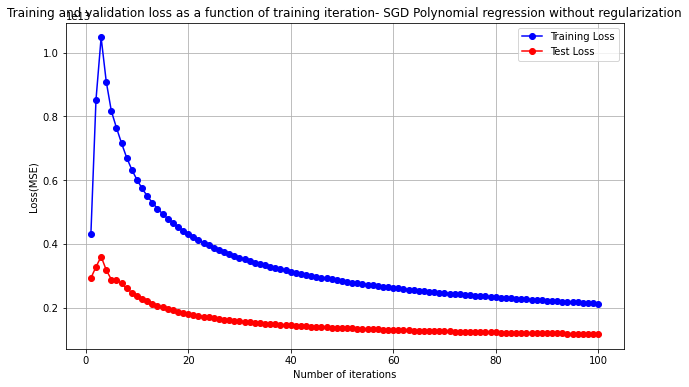

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD Polynomial regression without regularization')
plt.legend()
plt.grid(True)
plt.show()

# F: Solution

Initially before passing to the model, the data is made as 2nd degree polynomial features. The SVD or normal equation LR model gives RMSE of 3.5434201213263408.While the rmse of stochastic Gradient descent is much higher, 8.564346423161213. This is due to jumping of learning rates and it does not converge.

We apply closed form SVD regularisation to check if the model is overfitting, after applying ridge, lasso and elasticnet methods, we find that Elasticnet gives the lowest RMSE when compared to other two regularisation across different learning rates. As we increase the learning rates, the error decreases for ridge, increases for both lasso and elastic net.

I also applied SGDregressor with regularisation and see that, ridge gives rmse of 8.633974845926131, and is the lowest when comapred to other two methods. As we increase the learning rates regularisation factor alpha, the error decreases for Ridge and lasso  but we can observe a slight decrease and then increase in error for elasticnet. This is observed because in higher alpha values, lasso eliminates the weights of least important features i.e some features are irrelevent and removing such features improves rmse and elastic net is tending more towards lasso than ridge in this case.

If we increase the  learning rate eta for ridge, lasso and elastic net the error increases immensely. If we increase the batch size, there is slight decrease in rmse values of ridge lasso and elastic net but we cannot observe signicant decrease, and when the batch size reaches to a value more than the number of the data points(rows), then we are essentially performing batch gradient descent and not mini batch gradient and hence this converges to the global minimum and we get lower rmse values. With Stochastic and Mini-batch Gradient Descent, the curves/values are not so
smooth/easy to analyse, and it may be hard to know whether you have reached the
minimum or not.

From the training and validation losses graphs, we observe that the training loss is more than the test loss, and there is a no significant gap in between the losses, this means that the model is underfitting due to polynomial features.

# G:

In [77]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
r = Ridge(alpha=0.01, solver="cholesky")
r.fit(X_train,y_train)
y_pred = r.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse)

y_pred_val = r.predict(X_test)
mse = mean_squared_error(y_test, y_pred_val)
rmse_test = np.sqrt(mse)

In [78]:
# root mean squared error for train data
rmse_train

4.118927064906074

In [79]:
# root mean squared error for test data
rmse_test

4.2627114232942676

In [80]:
# predictions labels on test data
y_pred_val

array([68.64338423, 62.00715044, 68.19600827, 77.51241982, 52.60411123,
       63.62960991, 75.8577546 , 76.84819484, 44.20269898, 67.14592741,
       70.21388324, 73.04502241, 54.58230277, 66.51540018, 70.73614553,
       68.07292852, 55.83988218, 64.03377711, 62.74026256, 77.40164428,
       60.13930874, 68.35156765, 79.18269951, 73.23323964, 63.90979138,
       72.43670424, 71.6444391 , 65.17611965, 53.36763789, 73.37045057,
       78.83939636, 71.25127228, 73.567058  , 68.63200901, 77.34488045,
       56.92036172, 73.45594821, 61.19533702, 71.50520175, 70.57896563,
       67.96125854, 72.39886502, 73.2217755 , 76.91330648, 82.71832802,
       73.08869835, 52.49913902, 62.65182111, 80.86835052, 60.91671986,
       62.15196961, 67.2549897 , 70.54498256, 76.53739046, 63.79040565,
       76.26540806, 75.69068717, 67.38744695, 83.8865871 , 77.79338939,
       70.7010444 , 71.10811495, 76.21876544, 71.30253738, 48.54769647,
       80.07216561, 57.34499988, 74.6103907 , 59.9014081 , 70.19

# G: Solution
From the observations and hyperparameter tuning done in previous questions, we can observe that Regularization with Ridge has the lowest Root mean sqaured value of 4.118927064906073 on the train set and 4.2627114232942676 on the test set. y_pred_val gives the test labels. I have chosen Root mean squared error as the metric for evaluation as it is a good metric for regression tasks, and  is sensitive to large errors. Squaring the errors in the calculation amplifies the impact of outliers or large prediction errors, which can be important to consider in some applications of the model. In this model, the learning rates(regularization factor) is 0.01 to serve optimal regularization and it is better than Stochastic gradient descent as SVD converges to global minimum unlike SGD which may or may not converge. The training loss is lower than testing by a small amount, so there is no overfitting.


Future work:

The model can be improved by selecting only those features that contribute to prediction of Life expectancy. This feature engineering can be done in various ways:

Feature selection techniques such as recursive feature elimination (RFE), feature importance from tree-based models, or statistical tests can help identify important features. The missing values can be imputed by using more advanced techniques like regression imputation. Creating interaction features by multiplying or combining two or more relevant features based on correlation and domain knowledge may help to create new features whis can help in prediction. The use of other regression algorithms apart from linear regression like SVM is a good choice for this problem.


# References:


1.   Dataset - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
2. https://github.com/ageron/handson-ml3/tree/main
3.   https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.
4. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition by Aurélien Géron, October 2022, O'Reilly Media, Inc.
ISBN: 9781098125974.
